In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [87]:
dataset = pd.read_csv("./50_Startups.csv")

In [88]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [89]:
dataset['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [90]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [91]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

# Encoding Categorical data

In [92]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [93]:
x  # 3 new encoding columns are at the beginning

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

Dummy variable trap will automatically taken care by sklearn - first column will be automatically discarded in above dataset
However following can be added

In [94]:
# Avoiding the Dummy Variable Trap - not required for sklearn
# x = x[:, 1:]

Feature scalling is not required in multiple linear regression because coefficient multiplied to 
each independent variable can adjust (Therefore it does not matter that some variable is high values)

# Spliting the dataset into Training set and Test set

In [95]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Train multiple Linear Regression Model

sklearn will take care of eliminating less imporant / unwanted features 

In [96]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

# Predicting the test set 

In [97]:
y_pred = regressor.predict(x_test)

# Compare y_pred with y_test

In [98]:
np.set_printoptions(precision=2)

np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1)
# axis=0 means vertical concatenation
# axis=1 means horizontal concatenation

array([[114664.42, 105008.31],
       [ 90593.16,  96479.51],
       [ 75692.84,  78239.91],
       [ 70221.89,  81229.06],
       [179790.26, 191050.39],
       [171576.92, 182901.99],
       [ 49753.59,  35673.41],
       [102276.66, 101004.64],
       [ 58649.38,  49490.75],
       [ 98272.03,  97483.56]])

In [99]:
y_test.reshape(len(y_test), 1)

array([[105008.31],
       [ 96479.51],
       [ 78239.91],
       [ 81229.06],
       [191050.39],
       [182901.99],
       [ 35673.41],
       [101004.64],
       [ 49490.75],
       [ 97483.56]])

In [100]:
x_sl = [i for i in range(0,len(y_test))]

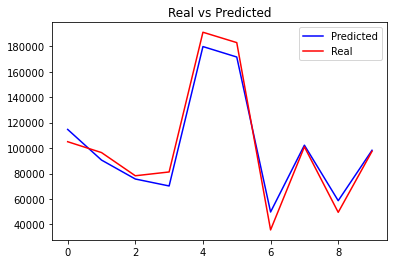

In [101]:
plt.plot(x_sl, y_pred, color='blue', label="Predicted" )
plt.plot(x_sl, y_test, color='red', label="Real")
plt.title("Real vs Predicted")
plt.legend(loc="upper right")
plt.show()

# Making a single prediction 
Predict profit with R&D spend = 160000, Admin Spend = 130000, Marketing Spend = 300000 & State = California

In [102]:
regressor.predict([[1, 0, 0, 160000, 130000, 300000]])


array([180892.25])

In [103]:
regressor.coef_

array([-2.85e+02,  2.98e+02, -1.24e+01,  7.74e-01, -9.44e-03,  2.89e-02])

In [104]:
regressor.intercept_

49834.88507321703

# Building the optimal list of predictor variable using Backward Elimination

In [105]:

import statsmodels.api as sm

# append 1 which acts as variable for contant/intercept term 
# statsmodels library has this limitation - it does not take contact term in account 
X = np.append(arr = np.ones((len(x_train), 1)).astype(int), values = x_train, axis = 1)

In [71]:
X

array([[1, 0.0, 0.0, 63408.86, 129219.61, 46085.25],
       [1, 0.0, 0.0, 38558.51, 82982.09, 174999.3],
       [1, 0.0, 1.0, 78389.47, 153773.43, 299737.29],
       [1, 1.0, 0.0, 28663.76, 127056.21, 201126.82],
       [1, 0.0, 1.0, 86419.7, 153514.11, 0.0],
       [1, 0.0, 0.0, 23640.93, 96189.63, 148001.11],
       [1, 0.0, 0.0, 0.0, 116983.8, 45173.06],
       [1, 1.0, 0.0, 75328.87, 144135.98, 134050.07],
       [1, 1.0, 0.0, 73994.56, 122782.75, 303319.26],
       [1, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1, 1.0, 0.0, 27892.92, 84710.77, 164470.71],
       [1, 0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1, 0.0, 1.0, 1000.23, 124153.04, 1903.93],
       [1, 0.0, 1.0, 77044.01, 99281.34, 140574.81],
       [1, 1.0, 0.0, 67532.53, 105751.03, 304768.73],
       [1, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [1, 1.0, 0.0, 55493.95, 103057.49, 214634.81],
       [1, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [1, 1.0, 0.0, 61994.48, 115641.28, 91131.24

In [72]:
# take all independent variable 
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_opt = X_opt.astype(np.float64)

regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     111.4
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           4.50e-20
Time:                        16:52:11   Log-Likelihood:                -420.72
No. Observations:                  40   AIC:                             853.4
Df Residuals:                      34   BIC:                             863.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.955e+04   8545.338      5.798      0.000    3.22e+04    6.69e+04
x1           582.7386   3617.468      0.161      0.873   -6768.841    7934.318
x2           272.7947   4022.405      0.068      0.946   -7901.717    8447.306
x3             0.7743      0.060     12.957      0.000       0.653       0.896
x4            -0.0094      0.065     -0.145      0.885      -0.142       0.123
x5             0.0289      0.022      1.342      0.188      -0.015       0.073
==============================================================================
Omnibus:                       20.912   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.482
Skew:                          -1.324   Prob(JB):                     2.67e-09
Kurtosis:                       7.084   Cond. No.                     1.55e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Note: 
x2 has p-value highest 0.946 and its greater than 0.05 (significance level)
Therefore x2 should be dropped in next iteration of Backward elimination

In [77]:
X_opt = X[:, [0, 1, 3, 4, 5]]
X_opt = X_opt.astype(np.float64)

regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     143.3
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           3.51e-21
Time:                        17:03:05   Log-Likelihood:                -420.72
No. Observations:                  40   AIC:                             851.4
Df Residuals:                      35   BIC:                             859.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.956e+04   8421.438      5.885      0.000    3.25e+04    6.67e+04
x1           476.4038   3213.321      0.148      0.883   -6046.984    6999.792
x2             0.7748      0.058     13.251      0.000       0.656       0.894
x3            -0.0089      0.064     -0.141      0.889      -0.138       0.120
x4             0.0289      0.021      1.361      0.182      -0.014       0.072
==============================================================================
Omnibus:                       21.031   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.156
Skew:                          -1.326   Prob(JB):                     1.91e-09
Kurtosis:                       7.131   Cond. No.                     1.55e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
X_opt = X[:, [0, 3, 4, 5]]
X_opt = X_opt.astype(np.float64)

regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           2.31e-22
Time:                        17:04:00   Log-Likelihood:                -420.73
No. Observations:                  40   AIC:                             849.5
Df Residuals:                      36   BIC:                             856.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.966e+04   8280.378      5.997      0.000    3.29e+04    6.65e+04
x1             0.7742      0.058     13.459      0.000       0.658       0.891
x2            -0.0088      0.063     -0.140      0.890      -0.136       0.119
x3             0.0293      0.021      1.416      0.165      -0.013       0.071
==============================================================================
Omnibus:                       21.307   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.502
Skew:                          -1.333   Prob(JB):                     9.73e-10
Kurtosis:                       7.218   Cond. No.                     1.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
X_opt = X[:, [0, 3, 5]]
X_opt = X_opt.astype(np.float64)

regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     302.5
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           1.18e-23
Time:                        17:04:01   Log-Likelihood:                -420.74
No. Observations:                  40   AIC:                             847.5
Df Residuals:                      37   BIC:                             852.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.859e+04   3143.889     15.456      0.000    4.22e+04     5.5e+04
x1             0.7712      0.053     14.628      0.000       0.664       0.878
x2             0.0303      0.019      1.579      0.123      -0.009       0.069
==============================================================================
Omnibus:                       21.380   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.649
Skew:                          -1.339   Prob(JB):                     9.04e-10
Kurtosis:                       7.221   Cond. No.                     5.44e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
X_opt = X[:, [0, 3]]
X_opt = X_opt.astype(np.float64)

regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     579.8
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           1.30e-24
Time:                        17:04:02   Log-Likelihood:                -422.05
No. Observations:                  40   AIC:                             848.1
Df Residuals:                      38   BIC:                             851.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.001e+04   3071.955     16.279      0.000    4.38e+04    5.62e+04
x1             0.8348      0.035     24.078      0.000       0.765       0.905
==============================================================================
Omnibus:                       18.860   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.780
Skew:                          -1.242   Prob(JB):                     1.26e-07
Kurtosis:                       6.592   Cond. No.                     1.81e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""